In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [97]:
start = '2013-01-01'
end = '2023-11-29'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [98]:
data.reset_index(inplace=True)

In [99]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...,...
2741,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
2742,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600
2743,2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
2744,2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800


In [100]:
ma_100_days = data.Close.rolling(100).mean()

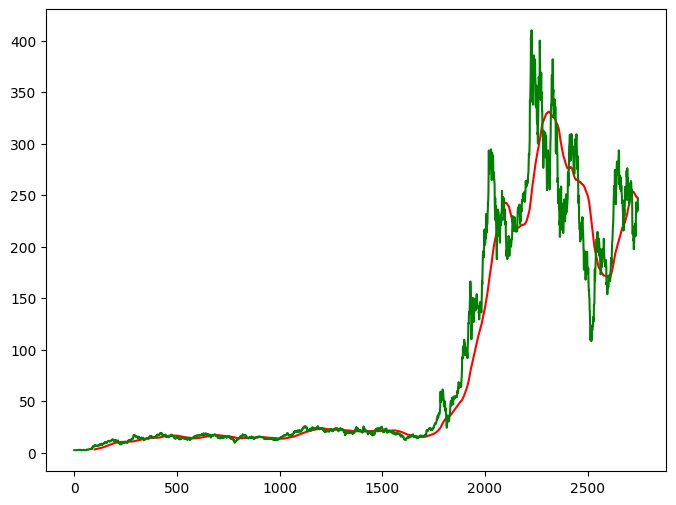

In [101]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [102]:
ma_200_days = data.Close.rolling(200).mean()

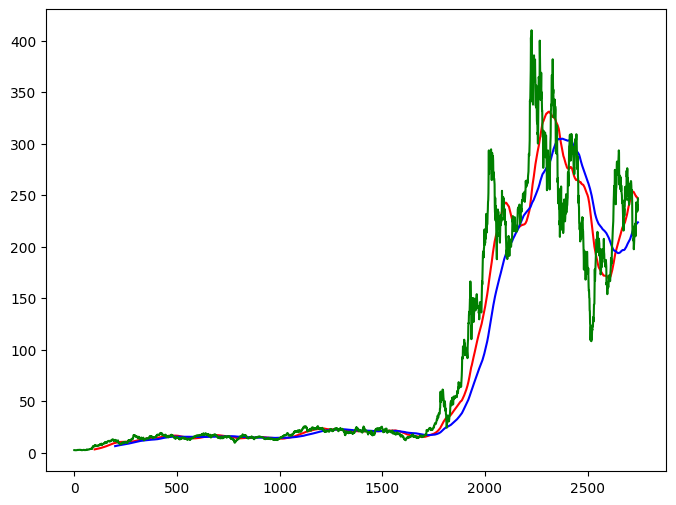

In [103]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [104]:
data.dropna(inplace=True)

In [105]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.90)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.90): len(data)])

In [106]:
data_train.shape[0]

2471

In [107]:
data_test.shape[0]

275

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [109]:
data_train_scale = scaler.fit_transform(data_train)

In [110]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [111]:
x, y = np.array(x), np.array(y)

In [112]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [113]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [114]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [115]:
from keras.callbacks import EarlyStopping
model.fit(x, y, epochs=50, batch_size=32)

Epoch 1/50


75/75 [==============================] - 34s 299ms/step - loss: 0.0176
Epoch 2/50
75/75 [==============================] - 23s 305ms/step - loss: 0.0047
Epoch 3/50
75/75 [==============================] - 23s 304ms/step - loss: 0.0049
Epoch 4/50
75/75 [==============================] - 23s 303ms/step - loss: 0.0064
Epoch 5/50
75/75 [==============================] - 23s 312ms/step - loss: 0.0040
Epoch 6/50
75/75 [==============================] - 19s 259ms/step - loss: 0.0040
Epoch 7/50
75/75 [==============================] - 19s 259ms/step - loss: 0.0037
Epoch 8/50
75/75 [==============================] - 19s 257ms/step - loss: 0.0042
Epoch 9/50
75/75 [==============================] - 20s 269ms/step - loss: 0.0035
Epoch 10/50
75/75 [==============================] - 20s 272ms/step - loss: 0.0030
Epoch 11/50
75/75 [==============================] - 21s 274ms/step - loss: 0.0035
Epoch 12/50
75/75 [==============================] - 21s 281ms/step - loss: 0.0030
Epoch 13/50
75/75 [=====

In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [117]:
pas_100_days = data_train.tail(100)

In [118]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [119]:
data_test_scale  =  scaler.fit_transform(data_test)

In [120]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [121]:
y_predict = model.predict(x)

9/9 [==============================] - 2s 102ms/step


In [122]:
from sklearn.preprocessing import MinMaxScaler
y_predict = scaler.inverse_transform(y_predict)
y = scaler.inverse_transform(y.reshape(-1, 1))

In [123]:
print(y_predict)

[[209.72495 ]
 [210.10106 ]
 [211.09464 ]
 [212.76411 ]
 [215.1064  ]
 [217.81001 ]
 [220.478   ]
 [222.19023 ]
 [222.62248 ]
 [221.73123 ]
 [219.59567 ]
 [216.56808 ]
 [212.95334 ]
 [209.08315 ]
 [205.28929 ]
 [201.76408 ]
 [198.64319 ]
 [195.94621 ]
 [193.62958 ]
 [191.62476 ]
 [189.82896 ]
 [188.19318 ]
 [186.73503 ]
 [185.47824 ]
 [184.43709 ]
 [183.6023  ]
 [183.05675 ]
 [182.89664 ]
 [183.15791 ]
 [183.63908 ]
 [184.11751 ]
 [184.4106  ]
 [184.44684 ]
 [184.26653 ]
 [183.89896 ]
 [183.36061 ]
 [182.67159 ]
 [181.86407 ]
 [180.96925 ]
 [180.01723 ]
 [179.02484 ]
 [177.9741  ]
 [176.85924 ]
 [175.65686 ]
 [174.19829 ]
 [172.32515 ]
 [169.9618  ]
 [167.09958 ]
 [163.70229 ]
 [159.7977  ]
 [155.49228 ]
 [150.9027  ]
 [146.31216 ]
 [142.03952 ]
 [138.2098  ]
 [134.76103 ]
 [131.6657  ]
 [129.0083  ]
 [126.82724 ]
 [125.119804]
 [123.86608 ]
 [123.031   ]
 [122.572975]
 [122.52295 ]
 [123.009315]
 [124.101974]
 [125.91497 ]
 [128.29889 ]
 [131.2973  ]
 [134.80136 ]
 [138.78406 ]
 [143.

In [124]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse
rmse_value = calculate_rmse(y, y_predict)
print(f'RMSE: {rmse_value}')



RMSE: 21.570447389461734


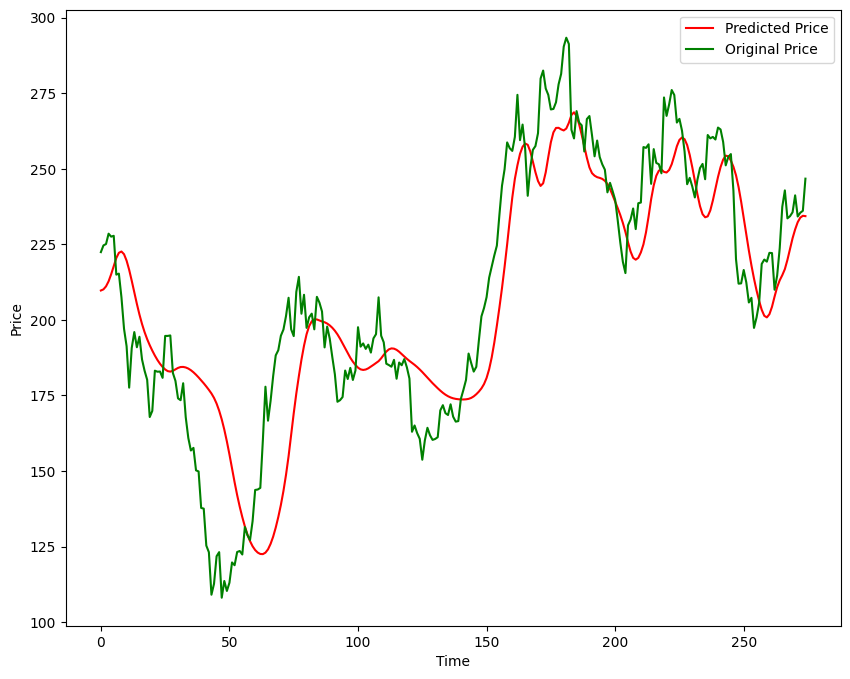

In [125]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [126]:
model.save('Stock_Model.keras')